In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from custom.models import linear_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from custom.metrics import regression_metrics

In [2]:
df_train = pd.read_csv('./custom/data/HousePrice/train.csv')
x_train, x_test, y_train, y_test = train_test_split(df_train[['LotFrontage', 'LotArea']], df_train['SalePrice'], test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1168, 2), (1168,), (292, 2), (292,))

In [3]:
x_train.fillna(x_train.mean(), inplace=True)
x_test.fillna(x_test.mean(), inplace=True)
x_train.head()

,LotFrontage,LotArea
1425,80.000000,10721
882,70.202703,9636
107,50.000000,6000
620,45.000000,8248
673,110.000000,14442


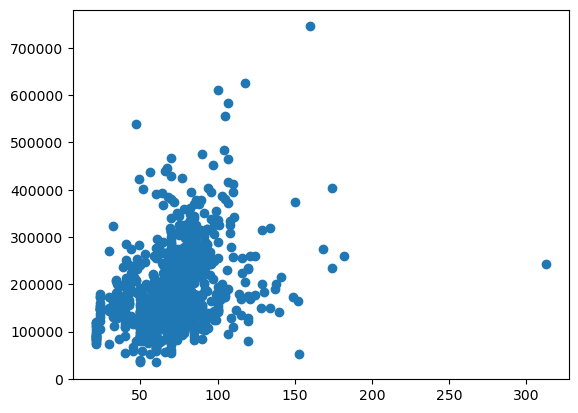

In [4]:
plt.scatter(x_train['LotFrontage'], y_train)

In [5]:
MyLinearRegression = linear_regression.linear_regression(alpha=1, epochs=100)
SklearnLinearRegression = LinearRegression()

In [6]:
SklearnLinearRegression.fit(x_train, y_train)
sklearn_predictions = SklearnLinearRegression.predict(x_test)

In [7]:
MyLinearRegression.fit(x_train, y_train)

-----------------------
Inputed data info:
Y. shape:  (1168,) type:  <class 'numpy.ndarray'> Ex: 142000
X. shape:  (1168, 2) type:  <class 'numpy.ndarray'> Ex: [   80. 10721.]
-----------------------


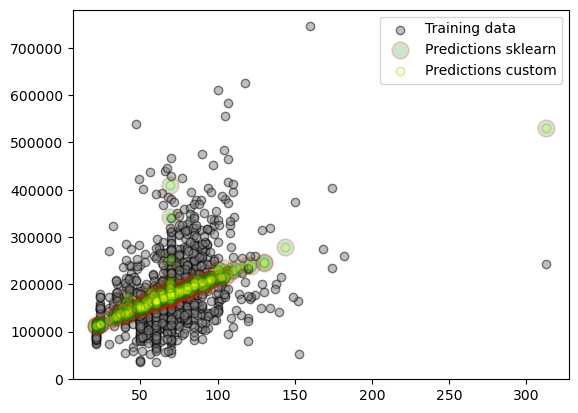

In [8]:
predictions = MyLinearRegression.predict(x_test)
plt.scatter(x_train['LotFrontage'], y_train, alpha = 0.5, color="grey", edgecolors="black", label="Training data")
plt.scatter(x_test['LotFrontage'], sklearn_predictions, alpha=0.2, color="green", edgecolors='red', label="Predictions sklearn", s=150)
plt.scatter(x_test['LotFrontage'], predictions, alpha=0.2, color="yellow", edgecolors='green', label="Predictions custom")
plt.legend()

In [9]:
custom_error = regression_metrics.MSE(predictions, y_test)
sklearn_error = mean_squared_error(sklearn_predictions, y_test)
print("Difference of MSE between custom linreg and sklearn linreg:", custom_error - sklearn_error)

Difference of MSE between custom linreg and sklearn linreg: 9.5367431640625e-07


In [10]:
r2_custom = regression_metrics.RSQ(y_test, predictions)
r2_sklean = r2_score( y_test, sklearn_predictions)
print("Difference of R2 between custom linreg and sklearn linreg: ",r2_custom - r2_sklean)

Difference of R2 between custom linreg and sklearn linreg:  -2.636779683484747e-16
